In [1]:

import json, os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
from mutagen.mp3 import MP3
import librosa
from tqdm import tqdm
from functools import partial
import multiprocessing

import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pymusickit.key_finder import KeyFinder

import essentia
import essentia.standard as es

matplotlib.rcParams["figure.dpi"] = 300

[   INFO   ] MusicExtractorSVM: no classifier models were configured by default


In [2]:
# Replace with your own directory
os.environ['MLOOPS_DIR'] = '../../dataset/mloops'

In [3]:
with open(os.environ['MLOOPS_DIR'] + '/metadata.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)

# Data Analysis

(-0.5, 799.5, 399.5, -0.5)

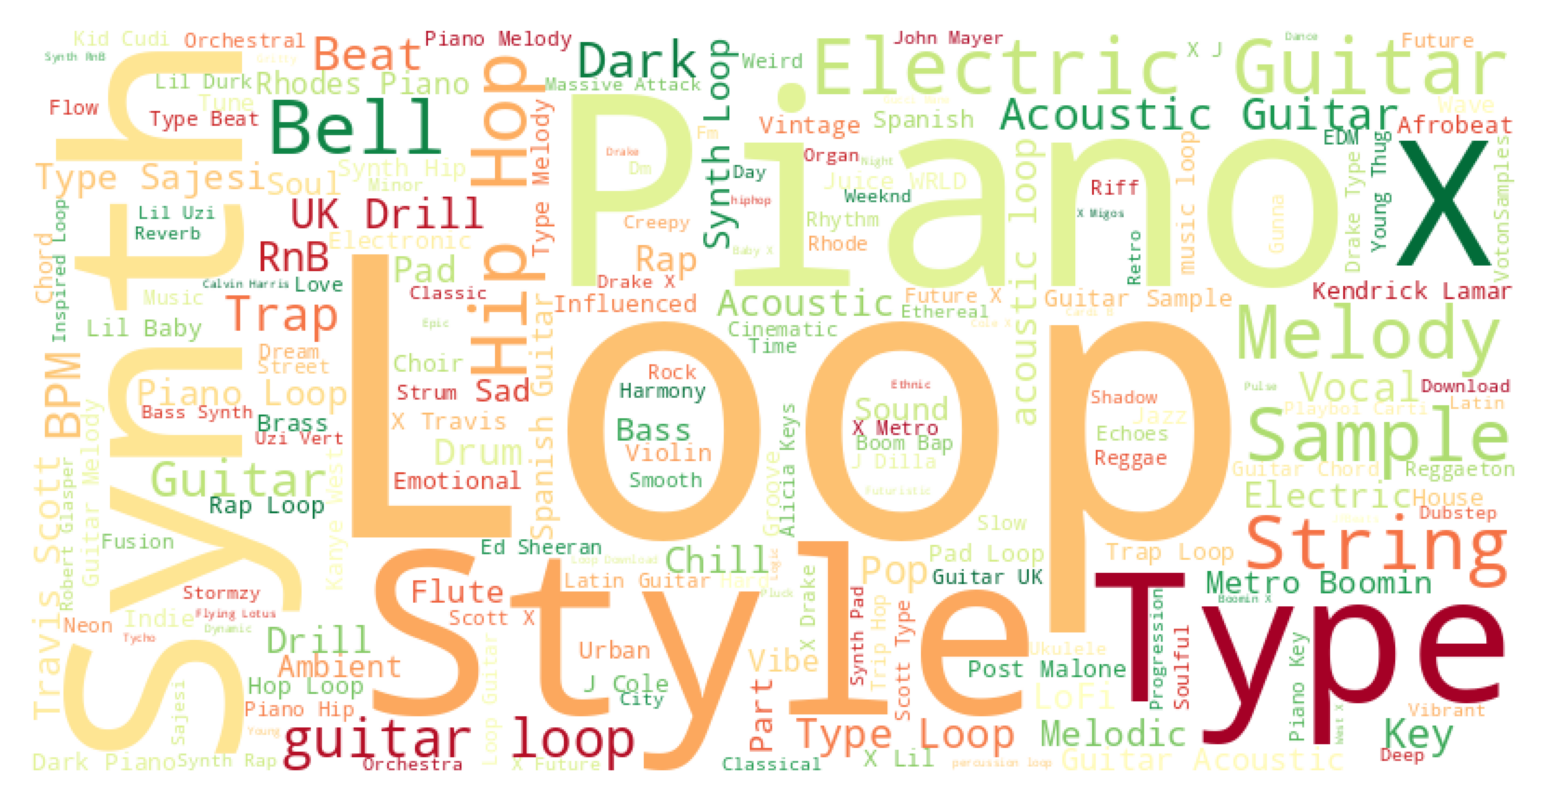

In [4]:

mata_text = ' '.join([d['title'].replace('-', '') for d in data])


wc = WordCloud(width=800, height=400, background_color='white', colormap='RdYlGn').generate(mata_text)
plt.imshow(wc)
plt.axis("off")

In [5]:
genres = [d['info']['Genre'] for d in data]
len(set(genres))

66

/tmp/ipykernel_1547707/247653222.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=genres, order=sorted_genre_names, palette=palette)


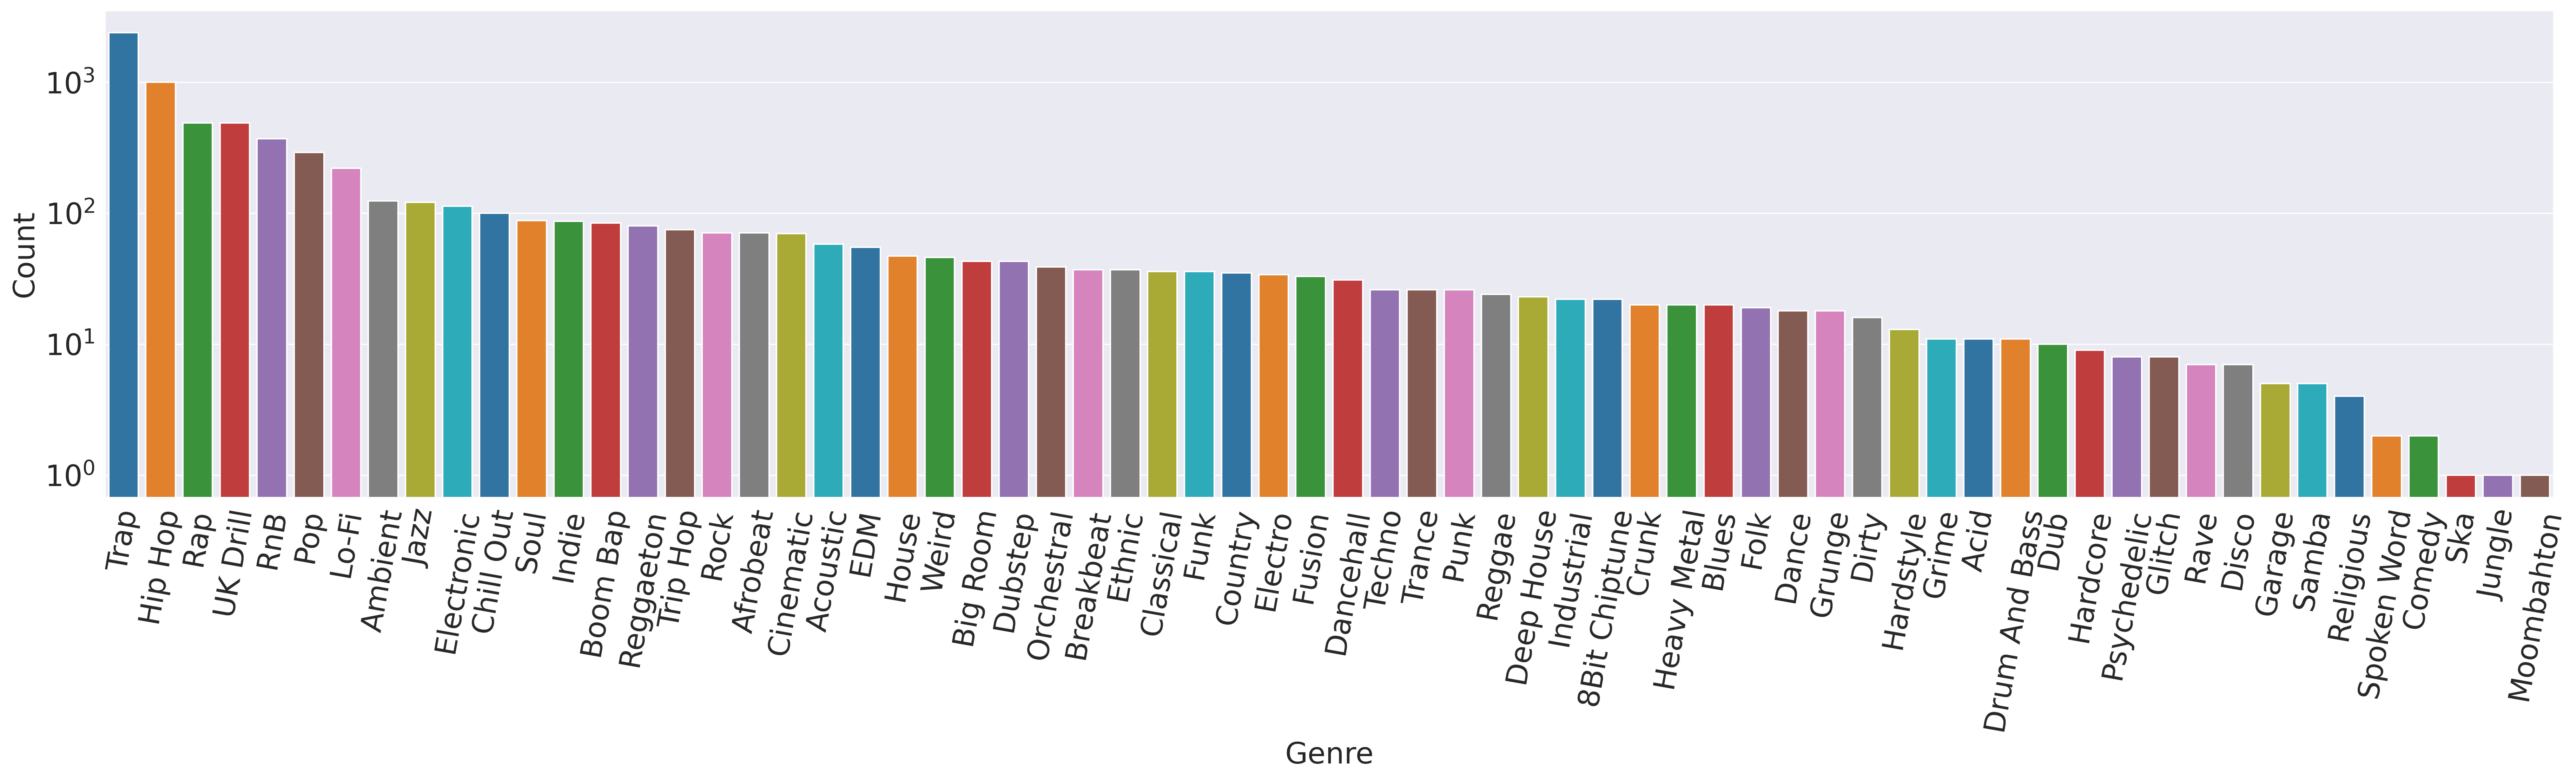

In [6]:

# Count the occurrences of each genre
genre_counts = Counter(genres)

# Sort the genres by their counts in descending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Create a list of genres sorted by their counts
sorted_genre_names = [genre for genre, count in sorted_genres]

# Using a countplot
sns.set_style("darkgrid")
plt.figure(figsize=(30, 6))
palette = sns.color_palette("tab10", len(sorted_genre_names))
sns.countplot(x=genres, order=sorted_genre_names, palette=palette)
# plt.title("Genre Occurrences", fontsize=16)
plt.yscale('log')
plt.xlabel("Genre", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=80, size=20)
plt.yticks(size=20)
plt.show()


In [7]:
cats = [d['info']['Category'] for d in data]
len(set(cats))

39

/tmp/ipykernel_1547707/206234321.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cats, order=sorted_cat_names, palette=palette)


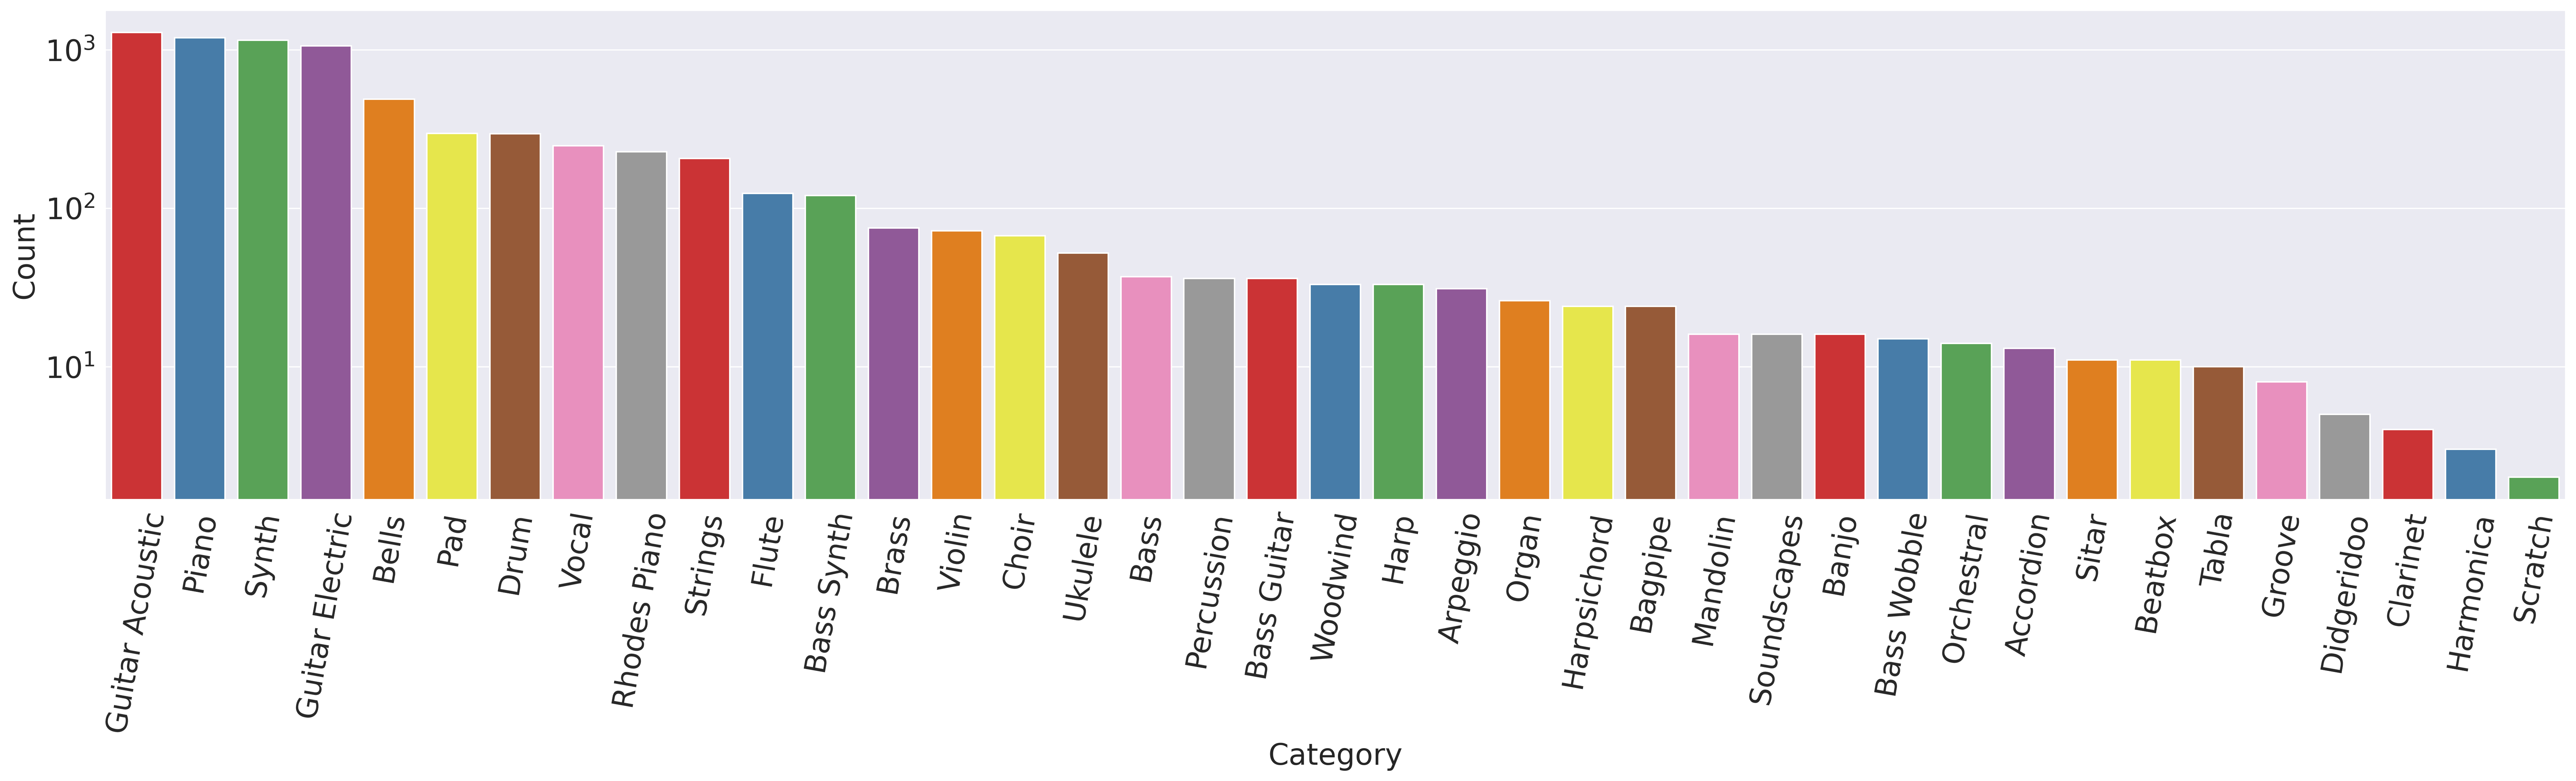

In [8]:

# Count the occurrences of each genre
cat_counts = Counter(cats)

# Sort the genres by their counts in descending order
sorted_cats = sorted(cat_counts.items(), key=lambda x: x[1], reverse=True)

# Create a list of genres sorted by their counts
sorted_cat_names = [cat for cat, count in sorted_cats]

# Using a countplot
sns.set_style("darkgrid")
plt.figure(figsize=(30, 6))
palette = sns.color_palette("Set1", len(sorted_cat_names))
sns.countplot(x=cats, order=sorted_cat_names, palette=palette)
# plt.title("Genre Occurrences", fontsize=16)
plt.yscale('log')
plt.xlabel("Category", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=80, size=20)
plt.yticks(size=20)
plt.show()


In [9]:
bpms = [int(d['info']['BPM']) for d in data]
len(set(bpms))

147

/tmp/ipykernel_1547707/1879330808.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=pd.cut(data_series, bins=bin_edges), order=pd.cut(data_series, bins=bin_edges).cat.categories, palette=palette)
/tmp/ipykernel_1547707/1879330808.py:11: UserWarning: The palette list has more values (50) than needed (49), which may not be intended.
  ax = sns.countplot(x=pd.cut(data_series, bins=bin_edges), order=pd.cut(data_series, bins=bin_edges).cat.categories, palette=palette)


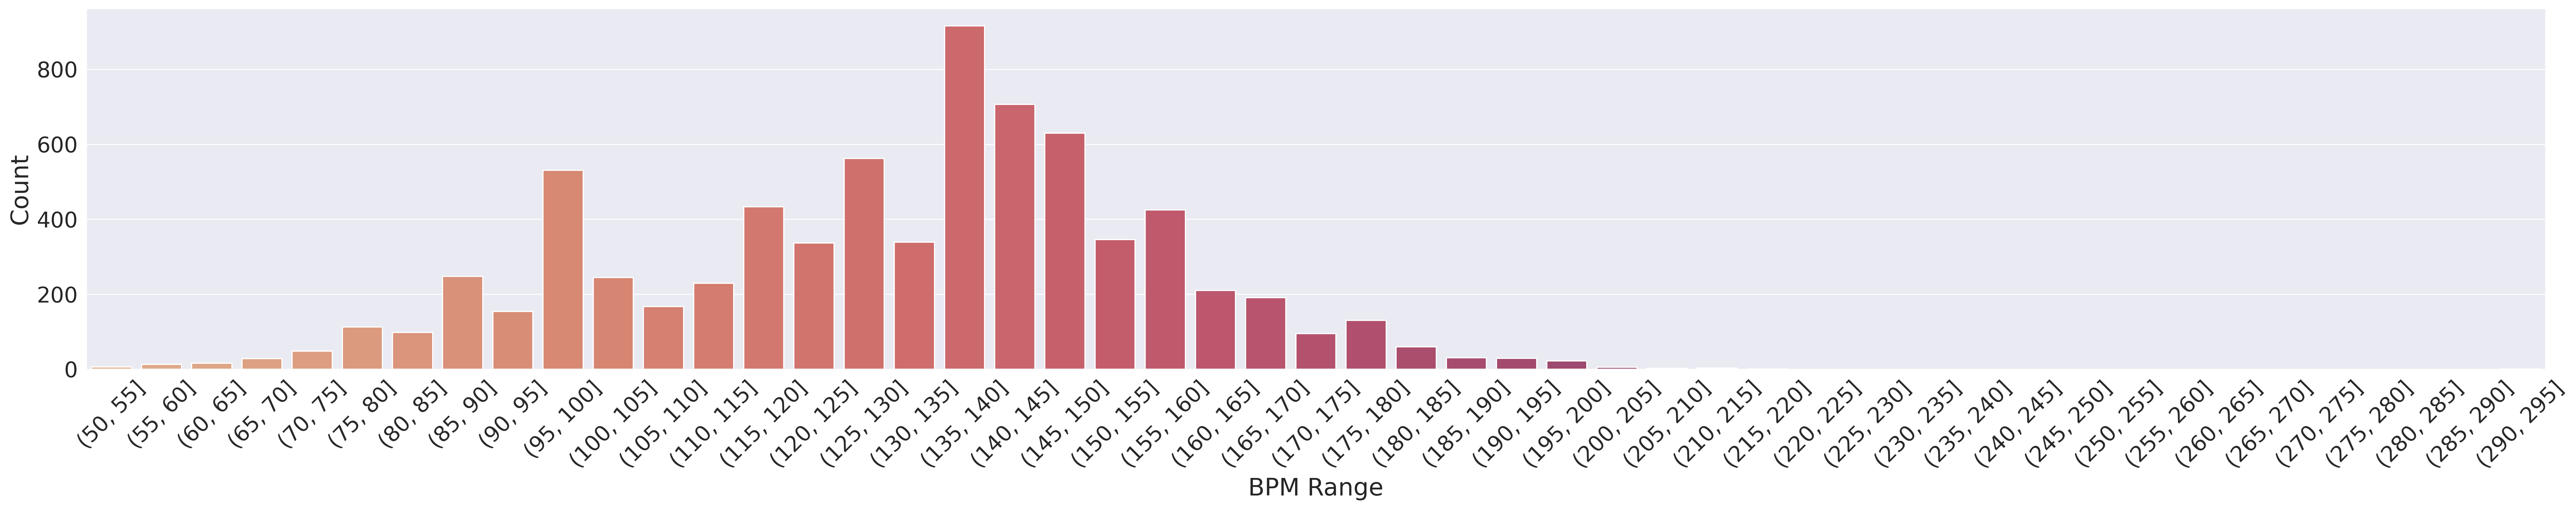

In [10]:
# Convert the data to a Pandas series
data_series = pd.Series(bpms)

# Define bin edges for grouping BPM values
bin_edges = np.arange(50, 300, 5)

# Create a countplot with custom bin edges
sns.set_style("darkgrid")
plt.figure(figsize=(30, 6))
palette = sns.color_palette("flare", len(bin_edges))
ax = sns.countplot(x=pd.cut(data_series, bins=bin_edges), order=pd.cut(data_series, bins=bin_edges).cat.categories, palette=palette)
# plt.yscale('log')
plt.xlabel("BPM Range", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=80, size=18)
plt.yticks(size=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
keys = [d['info']['Key'] for d in data]
str(keys)

"['C', 'Dm', 'Am', 'A#m', 'C#m', 'Cm', 'C#', 'C#', 'A#m', 'Am', 'F#m', 'Am', 'Fm', 'Fm', 'Gm', 'F#m', 'Bm', 'C#', 'Bm', 'G#', 'C#m', 'A', 'Am', 'G#m', 'E', 'Em', 'F#', 'Gm', 'Gm', 'Dm', 'Cm', 'Fm', 'D', 'Dm', 'Am', 'C', 'D#', 'F#m', 'Em', 'A', 'Dm', 'D#m', 'Cm', 'F#m', 'Gm', 'A', 'Am', 'G', 'G#m', 'Dm', 'F', 'G#m', 'Cm', 'Cm', 'Em', 'A#m', 'C#m', 'F#m', 'F#m', 'A#m', 'F#m', 'Dm', 'Dm', 'C#m', 'B', 'G#m', 'Fm', 'Em', 'Dm', 'Em', 'D#m', 'C#m', 'A#m', 'D', 'D#m', 'F#m', 'Fm', 'G#', 'D', 'D#m', 'Bm', 'Em', 'Am', 'Bm', 'A#m', 'Gm', 'G#', 'Dm', 'Fm', 'Am', 'G#m', 'Bm', 'D#m', 'Am', 'Bm', 'G#m', 'Cm', 'A#m', 'Bm', 'Em', 'Fm', 'G', 'Am', 'D', 'E', 'C#m', 'F#', 'D#m', 'A', 'Bm', 'Em', 'F#m', 'Fm', 'D#m', 'G#m', 'C#m', 'F#m', 'E', 'E', 'C#', 'Fm', 'Am', 'Gm', 'A#m', 'Dm', 'G', 'G#m', 'Gm', 'F#m', 'Gm', 'Dm', 'Gm', 'A#m', 'Em', 'Cm', 'Gm', 'Am', 'A#m', 'F', 'B', 'Cm', 'D', 'Cm', 'Em', 'C', 'F#', 'Bm', 'Dm', 'Gm', 'Fm', 'Cm', 'A#m', 'Em', 'Bm', 'Cm', 'Gm', 'B', 'G#m', 'Cm', 'F#m', 'Bm', 'G#m', 'Am

/tmp/ipykernel_1547707/2918345417.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=keys, order=sorted(set(keys)), palette=palette)


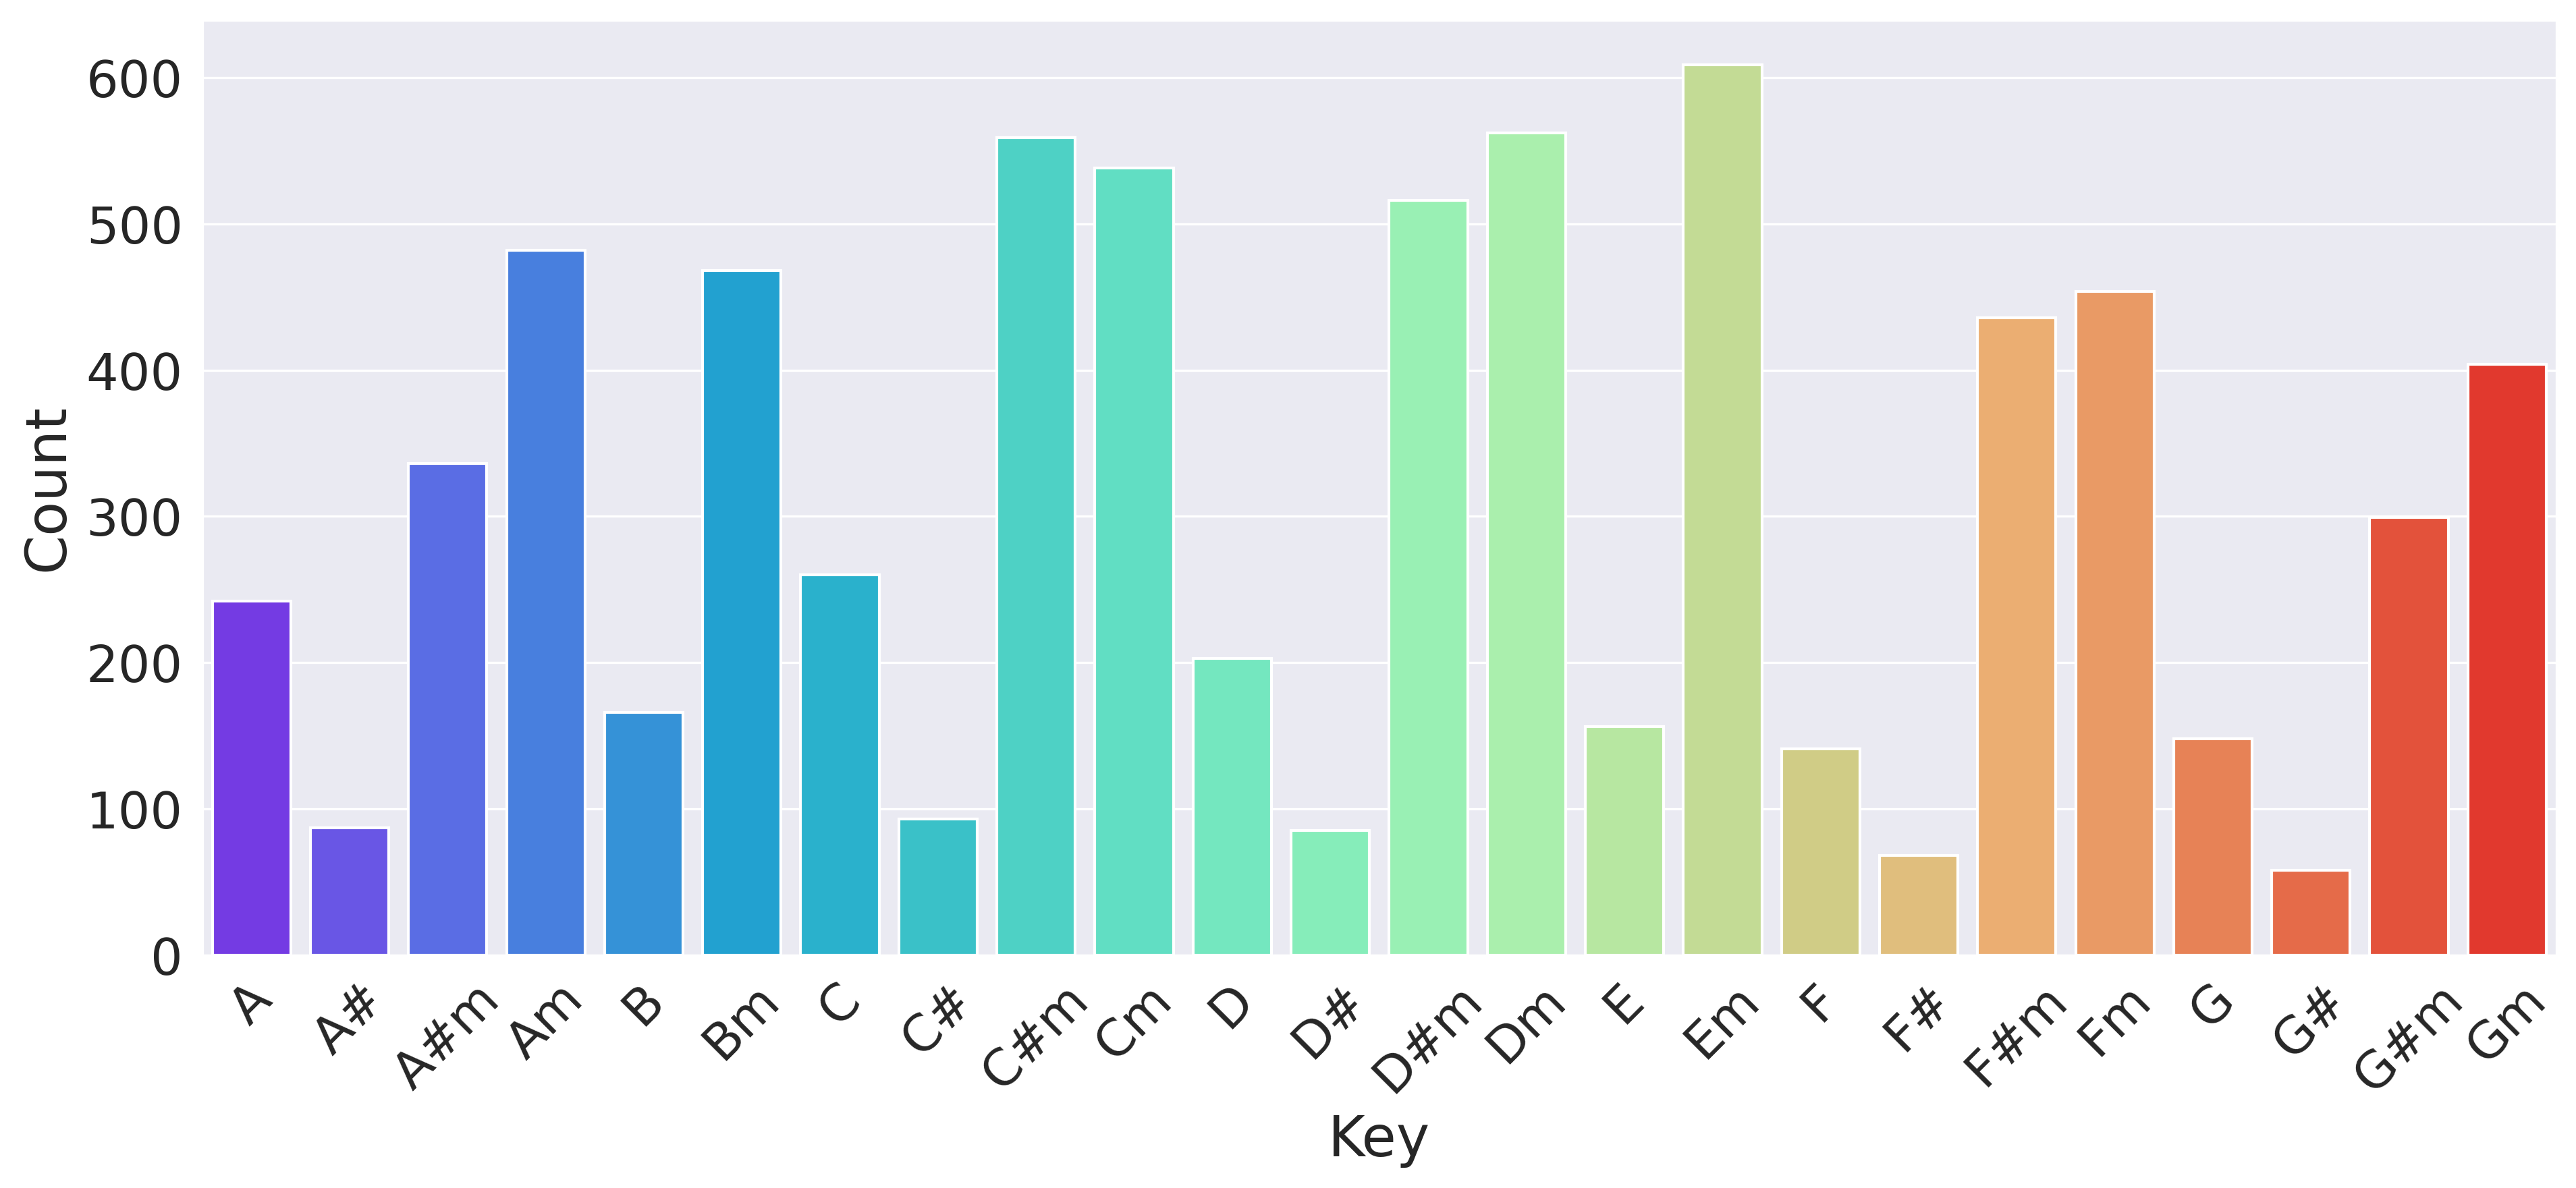

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
palette = sns.color_palette("rainbow", len(set(keys)))
sns.countplot(x=keys, order=sorted(set(keys)), palette=palette)
plt.xlabel("Key", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=80, size=18)
plt.yticks(size=18)
plt.xticks(rotation=45)
plt.show()

In [13]:
MmKeys = {
    'Major': 0,
    'Minor': 0
}

for k in keys:
    if k[-1] == 'm':
        MmKeys['Minor'] += 1
    else:
        MmKeys['Major'] += 1

In [14]:
MmKeys

{'Major': 1707, 'Minor': 5663}

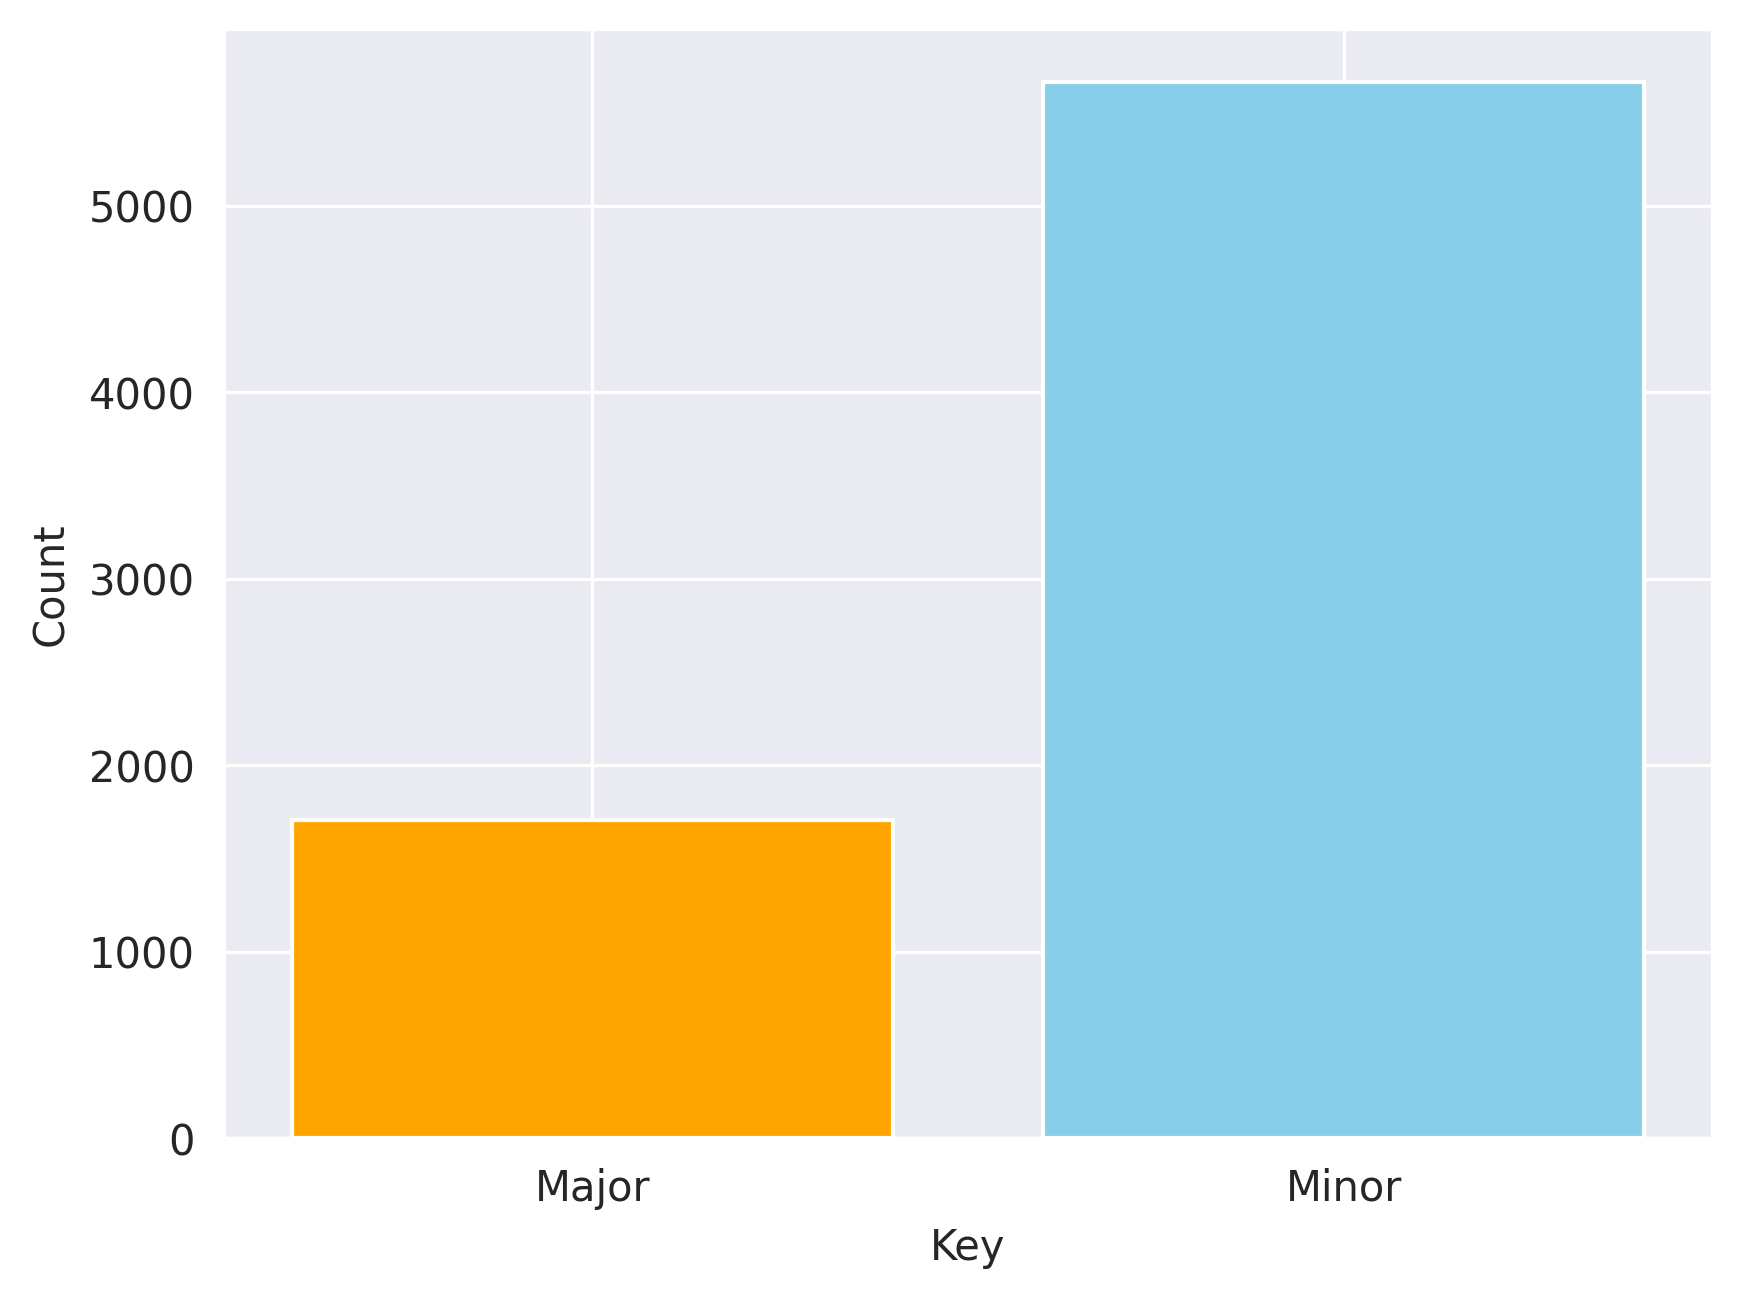

In [15]:
# Extract keys and values
keys = list(MmKeys.keys())
values = list(MmKeys.values())

# Create a bar plot
colors = ['orange', 'skyblue']
plt.bar(keys, values, color=colors)

# Add labels and title
plt.xlabel('Key')
plt.ylabel('Count')
# plt.title('Key Occurances II')

# Show the plot
plt.show()

In [16]:
data[:1]

data_w_daws = list(filter(lambda d: 'DAW' in d['info'], data))

daws = [d['info']['DAW'] for d in data_w_daws]


In [17]:
len(data_w_daws)

6978

/tmp/ipykernel_1547707/3136056984.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=daws, order=sorted_daw_names, palette=palette)


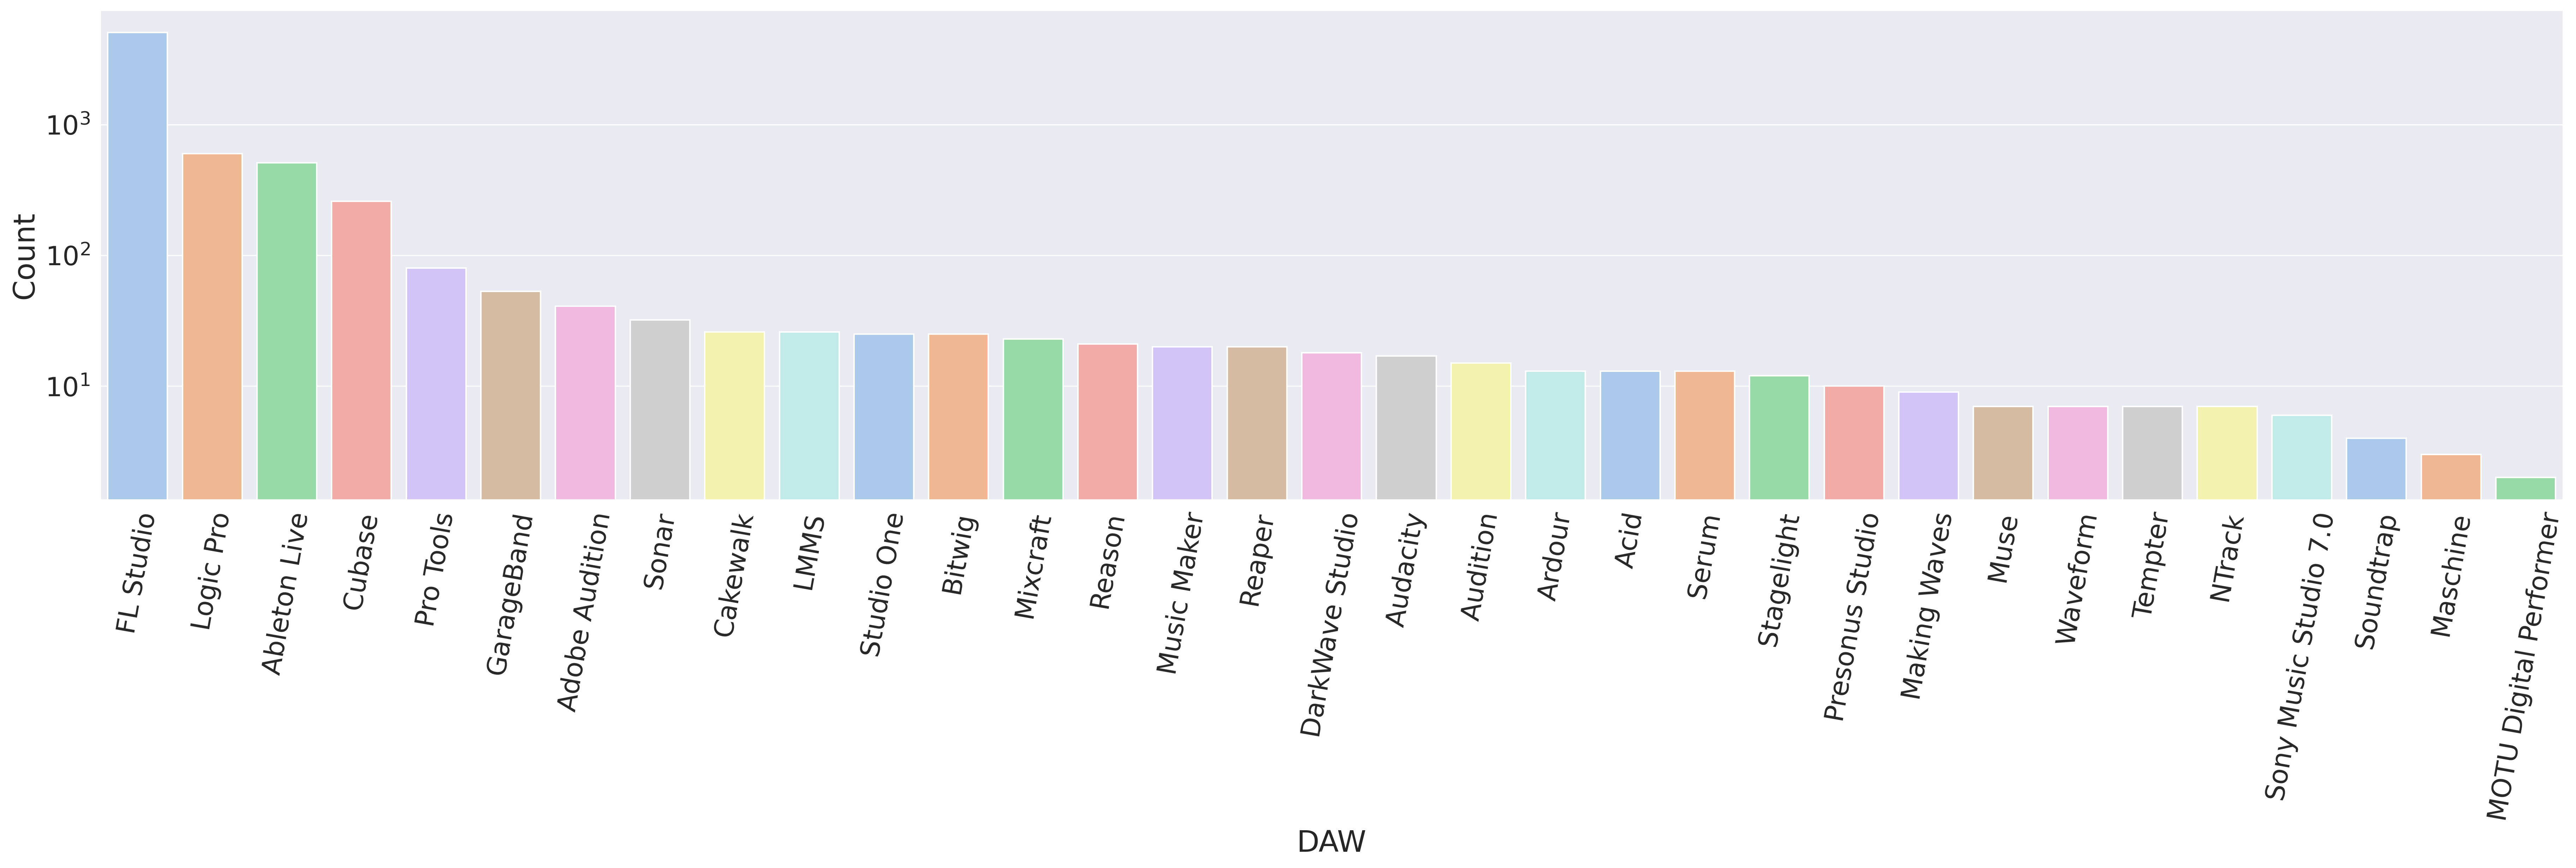

In [18]:
# Count the occurrences of each genre
daw_counts = Counter(daws)

# Sort the genres by their counts in descending order
sorted_daws = sorted(daw_counts.items(), key=lambda x: x[1], reverse=True)

# Create a list of genres sorted by their counts
sorted_daw_names = [daw for daw, count in sorted_daws]


sns.set_style("darkgrid")
plt.figure(figsize=(30, 6))
palette = sns.color_palette("pastel", len(set(sorted_daw_names)))
sns.countplot(x=daws, order=sorted_daw_names, palette=palette)
plt.yscale('log')
plt.xlabel("DAW", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=80, size=18)
plt.yticks(size=18)
plt.show()

In [21]:
durs = []
for d in data:
    f = d['file_path']
    audio = MP3(os.environ['MLOOPS_DIR'] + '/' + f)
    dur = audio.info.length
    durs.append(dur)

In [22]:
max(durs), min(durs)

(59.63755102040816, 8.045714285714286)

/tmp/ipykernel_1547707/3281419251.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=pd.cut(data_series, bins=bin_edges), order=pd.cut(data_series, bins=bin_edges).cat.categories, palette=palette)
/tmp/ipykernel_1547707/3281419251.py:11: UserWarning: The palette list has more values (52) than needed (51), which may not be intended.
  ax = sns.countplot(x=pd.cut(data_series, bins=bin_edges), order=pd.cut(data_series, bins=bin_edges).cat.categories, palette=palette)


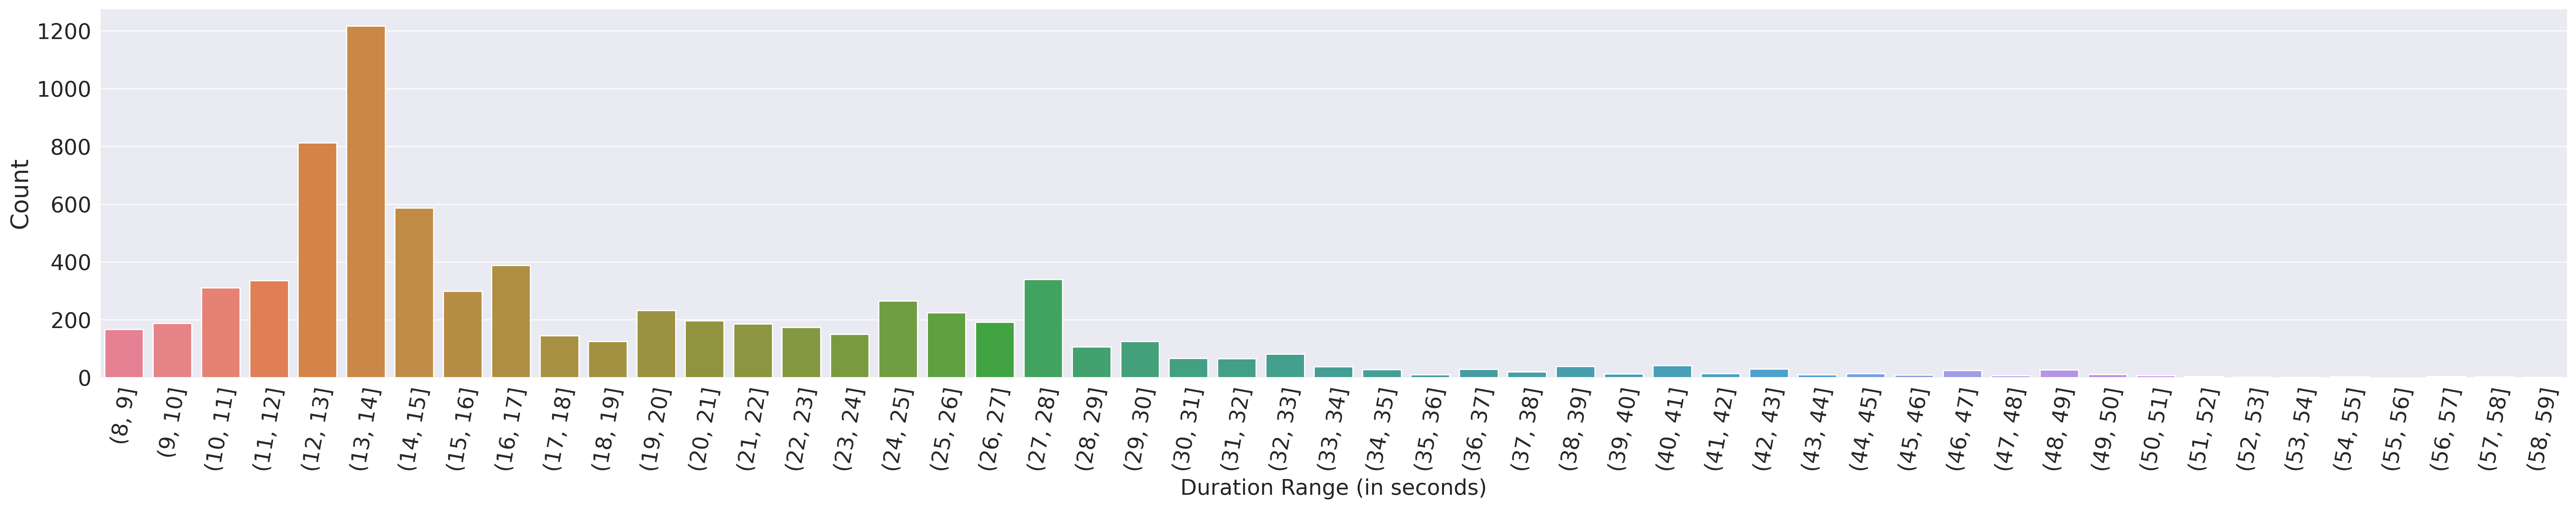

In [23]:
# Convert the data to a Pandas series
data_series = pd.Series(durs)

# Define bin edges for grouping BPM values
bin_edges = np.arange(8, 60, 1)

# Create a countplot with custom bin edges
sns.set_style("darkgrid")
plt.figure(figsize=(30, 6))
palette = sns.color_palette("husl", len(bin_edges))
ax = sns.countplot(x=pd.cut(data_series, bins=bin_edges), order=pd.cut(data_series, bins=bin_edges).cat.categories, palette=palette)
plt.xlabel("Duration Range (in seconds)", fontsize=18)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=80, size=18)
plt.yticks(size=18)
plt.tight_layout()
plt.show()

# Evaluate Dataset

In [26]:
def process_data(d, base_path):
    gt_tempo = d['info']['BPM']
    y, sr = librosa.load(os.path.join(base_path, d['file_path']))
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    est_tempo = librosa.feature.tempo(onset_envelope=onset_env, sr=sr)
    return (gt_tempo, est_tempo)

base_path = os.environ['MLOOPS_DIR']
tempos = []

with multiprocessing.Pool(32) as pool:
    process_func = partial(process_data, base_path=base_path)
    for result in tqdm(pool.imap(process_func, data), total=len(data)):
        tempos.append(result)

tempos = [(float(t[0]), t[1][0]) for t in tempos]

  0%|          | 0/7370 [00:00<?, ?it/s]

100%|██████████| 7370/7370 [04:27<00:00, 27.59it/s]


In [29]:
accuracy = len(list(filter(lambda t: abs(t[0] - t[1]) < t[0] * 0.04, tempos))) / len(tempos)

accuracy2 = len(list(filter(lambda t: abs(t[0] - t[1]) < t[0] * 0.04 or abs(t[0]/2 - t[1]) < t[0] * 0.04 or abs(t[0]/3 - t[1]) < t[0] * 0.04 or abs(t[0]*2 - t[1]) < t[0] * 0.04 or abs(t[0]*3 - t[1]) < t[0] * 0.04, tempos))) / len(tempos)

accuracy_e = len(list(filter(lambda t: int(t[0]) == round(t[1]), tempos))) / len(tempos)

In [30]:
accuracy, accuracy2, accuracy_e

(0.47937584803256444, 0.5613297150610583, 0.028493894165535955)

In [32]:
from deeprhythm import DeepRhythmPredictor

model = DeepRhythmPredictor()

Model weights already exist.


In [34]:
tempos = []

for d in tqdm(data):
    gt_tempo = float(d['info']['BPM'])
    audio_path = os.path.join('/home/xingxing/aimusic/dataset/mloops', d['file_path'])
    tempo = model.predict(audio_path)
    tempos.append((gt_tempo, tempo))

  0%|          | 0/7370 [00:00<?, ?it/s]/home/xingxing/anaconda3/envs/audiocaps/lib/python3.8/site-packages/torch/nn/modules/conv.py:459: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:895.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 7370/7370 [06:35<00:00, 18.64it/s]


In [35]:
accuracy = len(list(filter(lambda t: abs(t[0] - t[1]) < t[0] * 0.04, tempos))) / len(tempos)

accuracy2 = len(list(filter(lambda t: abs(t[0] - t[1]) < t[0] * 0.04 or abs(t[0]/2 - t[1]) < t[0] * 0.04 or abs(t[0]/3 - t[1]) < t[0] * 0.04 or abs(t[0]*2 - t[1]) < t[0] * 0.04 or abs(t[0]*3 - t[1]) < t[0] * 0.04, tempos))) / len(tempos)

accuracy_e = len(list(filter(lambda t: int(t[0]) == round(t[1]), tempos))) / len(tempos)

In [36]:
accuracy, accuracy2, accuracy_e

(0.6272727272727273, 0.8008141112618724, 0.15006784260515604)

In [38]:
def process_data(d, base_path):
    gt_key = d['info']['Key']
    audio_path = os.path.join(base_path, d['file_path'])
    song = KeyFinder(audio_path)
    est_key = song.key_primary
    return (gt_key, est_key)

base_path = os.environ['MLOOPS_DIR']
keys = []

with multiprocessing.Pool(32) as pool:
    process_func = partial(process_data, base_path=base_path)
    for result in tqdm(pool.imap(process_func, data), total=len(data)):
        keys.append(result)

100%|██████████| 7370/7370 [04:57<00:00, 24.79it/s]


In [39]:
keys = [(k[0], k[1].replace(' minor', 'm').replace(' major', '')) for k in keys]
# keys
accuracy = len(list(filter(lambda k: k[0] == k[1], keys))) / len(keys)

accuracy

0.401763907734057

In [40]:
def process_data(d, base_path):
    gt_key = d['info']['Key']
    audio_path = os.path.join(base_path, d['file_path'])
    features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'],
                                              rhythmStats=['mean', 'stdev'],
                                              tonalStats=['mean', 'stdev'])(audio_path)
    song = KeyFinder(audio_path)
    est_key = features['tonal.key_edma.key'] + ' ' + features['tonal.key_edma.scale']
    return (gt_key, est_key)

base_path = os.environ['MLOOPS_DIR']
keys = []

with multiprocessing.Pool(32) as pool:
    process_func = partial(process_data, base_path=base_path)
    for result in tqdm(pool.imap(process_func, data), total=len(data)):
        keys.append(result)

[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Read metadata
  0%|          | 0/7370 [00:00<?, ?it/s][   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Read metad

In [41]:
keys = [(k[0], k[1].replace(' minor', 'm').replace(' major', '')) for k in keys]
# keys
accuracy = len(list(filter(lambda k: k[0] == k[1], keys))) / len(keys)

accuracy

0.26865671641791045